In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, 100)
X = x.reshape(-1, 1)

In [3]:
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [4]:
X.shape

(100, 1)

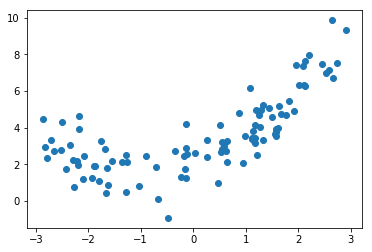

In [5]:
plt.scatter(x, y)

### 学习曲线

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 定义绘制学习曲线的函数

In [8]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train) + 1):
        
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        
        y_test_predict = algo.predict(X_test)
        
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train) + 1)], np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train) + 1)], np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis = [-1, 4, -1, 75]
        
        

### 定义多项式回归函数，使用pipeline

In [9]:
def polynomialRegression(degree):
    return Pipeline(
        [("poly", PolynomialFeatures(degree=degree)),
         ("std_scaler", StandardScaler()),
         ("lin_reg", LinearRegression())]
    )

### 划分数据集

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 使用线性回归并绘制学习曲线

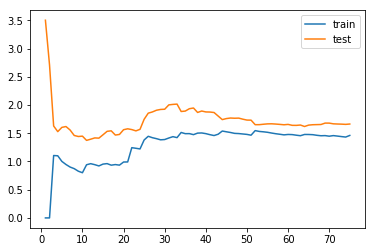

In [11]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

### 使用多项式回归并绘制学习曲线

In [12]:
poly2_reg = polynomialRegression(2)

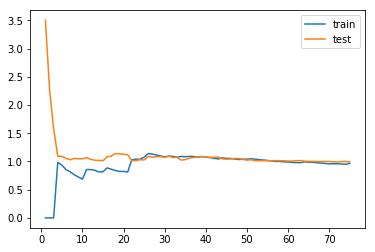

In [13]:
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

In [14]:
poly20_reg = polynomialRegression(20)

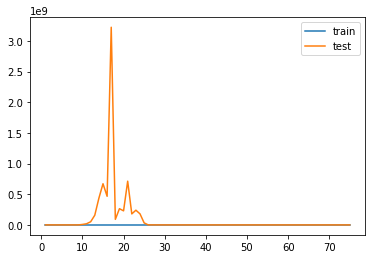

In [15]:
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)